<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Time_Series_para_previs%C3%A3o_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE SÉRIES TEMPORAIS PARA PREVISÃO**


# Aula 1 - Entendendo o Problema

## Vídeo 1.2

In [156]:
#instalando versão atualizada do statsmodels
!pip install statsmodels==v0.11.0rc2

In [157]:
#Importando bibliotecas
import pandas as pd
#importando uma lib para lidar com gráficos
import matplotlib.pyplot as plt
#lib para lidar com conversão de dados na plotagem
from pandas.plotting import register_matplotlib_converters
#biblioteca para lidar com números e funções matemáticas
import numpy as np
#statsmodels
import statsmodels as sm

In [158]:
print('Versão do statsmodels -> %s' % sm.__version__)

Versão do statsmodels -> 0.11.0rc2


### Dados CO2 - criação DF

In [159]:
#cria o df. Separador tabulação
carbonico = pd.read_csv('co2.csv',sep='\t')

In [160]:
#visualizando os dados
carbonico.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


Text(0.5, 0, 'Data')

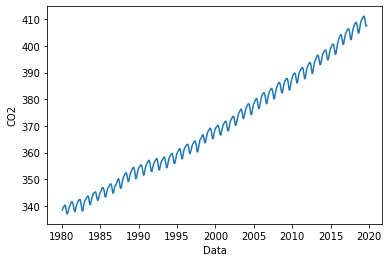

In [161]:
#cria o primeiro gráfico
plt.plot(carbonico['data'],carbonico['media'])
plt.ylabel('CO2')
plt.xlabel('Data')

### Dados Nascimento - criação DF

In [162]:
#cria dataframe
nasc = pd.read_csv('nascimentos.csv')

In [163]:
#vendo a base de nascimentos
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

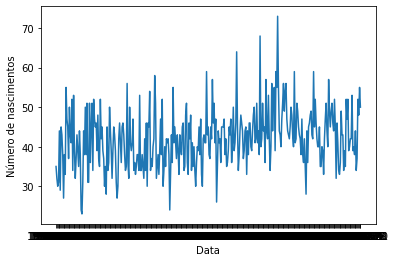

In [164]:
#colocando num gráfico
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data") #a data está um pouco estranha por isso a visualização fica estranha

#### Conversão de datas

In [165]:
#convertendo o tipo de data
nasc["data"] = pd.to_datetime(nasc["data"])

In [166]:
#passa o conversor para a plotagem
register_matplotlib_converters()

Text(0.5, 0, 'Data')

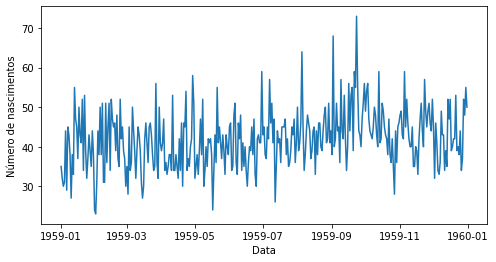

In [167]:
#novo plot com as datas corrigidas
plt.figure(figsize = (8,4));
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

## Vídeo 1.3

In [168]:
#conferindo a média da coluna média do DF de co2
media_carb = np.mean(carbonico["media"])

In [169]:
#criando um ponto médio entre as duas primeiras datas
dt_carb = carbonico["data"][1]-carbonico["data"][0]

Text(0.5, 0, 'Data')

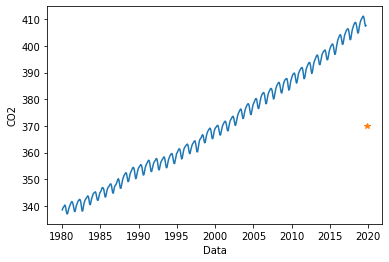

In [170]:
plt.plot(carbonico["data"],carbonico['media'])
#estimativa de média
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_carb, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [171]:
media_nasc = np.mean(nasc["n_nasc"])

In [172]:
dt_nasc = nasc["data"][1]-nasc["data"][0]

Text(0.5, 0, 'Data')

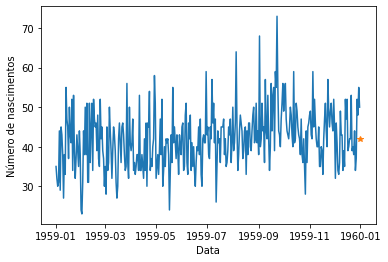

In [173]:
plt.plot(nasc["data"],nasc["n_nasc"])
#plota a estimativa
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [174]:
carbonico.shape

(477, 2)

In [175]:
#estimando pela média dos últimos 3 pontos
media_tres_pontos_c = np.mean(carbonico["media"][474:476])

Text(0.5, 0, 'Data')

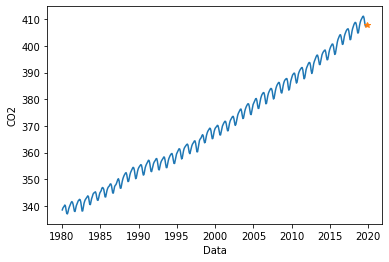

In [176]:
#plot + estimativa
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_tres_pontos_c, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [177]:
nasc.shape

(365, 2)

In [178]:
media_tres_pontos_n = np.mean(nasc["n_nasc"][362:364])

Text(0.5, 0, 'Data')

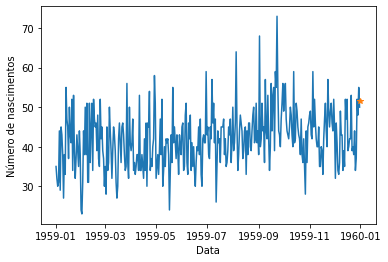

In [179]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

#Aula 02 - Tratamento e estacionariedade

## Vídeo 2.1 - Média Móvel

### Na base carbonico

In [180]:
#calculada através da função roolling.mean
#calculando a média de 5 em 5 pontos
media_movel_c = carbonico.rolling(5).mean()
media_movel_c 

,data,media
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1980.2084,339.450
...,...,...
472,2019.2084,410.548
473,2019.2916,410.680
474,2019.3750,410.390
475,2019.4584,409.746


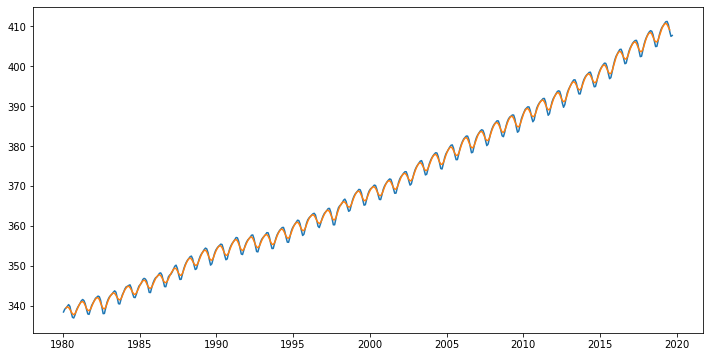

In [181]:
plt.figure(figsize=(12,6))
#gráfico original
plt.plot(carbonico['data'], carbonico['media'])
#gráfico com a média móvel aplicada
plt.plot(media_movel_c['data'], media_movel_c['media'])
plt.show()

### Na base nasc

In [182]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [183]:
#calculada através da função roolling.mean
#calculando a média de 5 em 5 pontos
media_movel_n = nasc.rolling(5).mean()
media_movel_n

,n_nasc
0,NaN
1,NaN
2,NaN
3,NaN
4,34.4
...,...
360,38.6
361,41.0
362,43.0
363,45.2


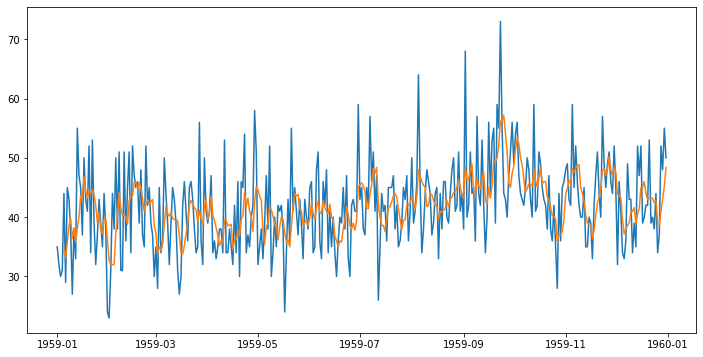

In [184]:
plt.figure(figsize=(12,6))
#gráfico original
plt.plot(nasc['data'], nasc['n_nasc'])
#gráfico com a média móvel aplicada
plt.plot(nasc['data'], media_movel_n['n_nasc'])
plt.show()

***O rolling(x).mean() vai passar uma janela de x em x pontos calculando a média. Utilizar um valor pequeno é ideal para suavizar a base sem perder características dos dados.***

### Gráficos de decomposição

#### Na base co2

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decompondo os ados em tendência, sazonalidade e ruído
result_c = seasonal_decompose(carbonico.set_index('data'), period=35)

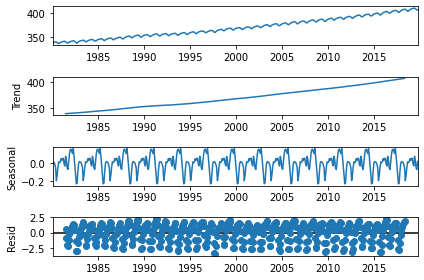

In [186]:
#plotando os dados decompostos. O ponto e vírgula faz com que os gráficos sejam plotados uma única vez
result_c.plot();

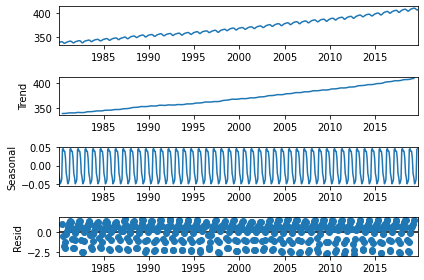

In [187]:
#mudando o período
result_c1 = seasonal_decompose(carbonico.set_index('data'), period=10)
result_c1.plot();

#### Na base nascimentos

In [188]:
#decompondo os dados em tendência, sazonalidade e ruído
result_n = seasonal_decompose(nasc.set_index('data'), period=35)

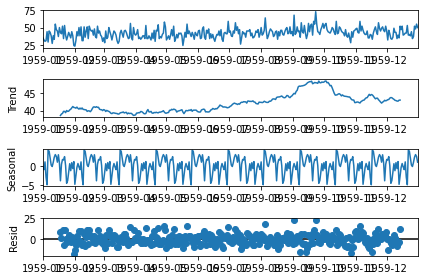

In [189]:
#plotando o resultado
result_n.plot();

## Video 2.2 - Estacionariedade

### Na base CO2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f917dea2f60>,
      dtype=object)

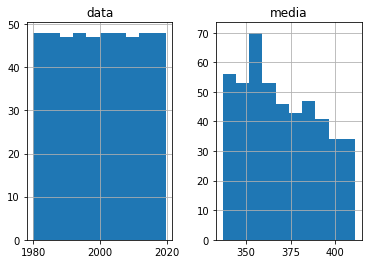

In [190]:
#plotando o histograma da base co2
carbonico.hist()
#cria um histograma pra cada feature do DF

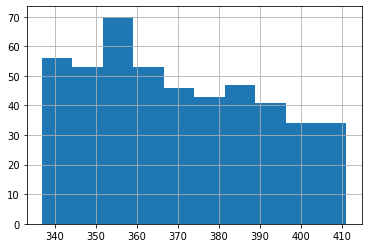

In [191]:
#histograma da média
#indica uma não estacionariedade (a estacionariedade pressupõe uma distribuição normal)
carbonico.media.hist()

In [192]:
#outra maneira de verificar estacionariedade
divide = int(len(carbonico)/2)

In [193]:
#cria um vetor com os valores das médias
x = carbonico['media'].values

In [194]:
#dividindo em dois vetores
#usando desempacotamento de tuplas
c1, c2 = x[0:divide], x[divide:]

In [195]:
#calculando a média da primeira metade
#uma variação entre as duas médias indica a não estacionariedade dos dados
c1.mean(),c2.mean()

(352.31550420168065, 387.816359832636)

In [196]:
#calculando a variância
#uma grande variação entre as duas variância indica a não estacionariedade dos dados
c1.var(), c2.var()

(73.90219533401597, 151.542490933282)

### Na base Nascimentos

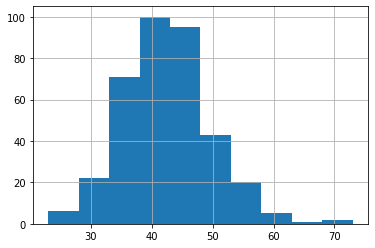

In [197]:
#esta curva está mais próxima de uma distribuição normal (curva Gaussiana), o que leva a crer que estes dados são mais próximos do estacionário
nasc.n_nasc.hist()

In [198]:
#dividindo a série em duas e calculando média e variância
divide = divide = int(len(nasc)/2)
y = nasc['n_nasc'].values

In [199]:
n1, n2 = y[0:divide], y[divide:]

In [200]:
#médias
#as médias são próximas (40 a 44)
n1.mean(), n2.mean()

(39.76373626373626, 44.185792349726775)

In [201]:
#variância
#a variância é muito parecida
#indica que os dados estão mais próximo da estacionariedade do que os de gás carbônico
n1.var(), n2.var()

(49.21341021615746, 48.708650601690096)

## Video 2.3 - Teste Augmented Dickey-Fuller (ADF)


***Conforme documentação do statsmodels, a função adfuller retorna:***

**adf** *(float)*: o teste estatístico

**pvalue** *(float)*: o p_value baseado em MacKinnon(1994,2010)

**usedlag** *(int)*: O número de *lags* usado.

**nobs** *(int)*: O número de observações usados para a regressão ADF e cálculo dos valores críticos.

**critical values** *(dict)*: Os valores críticos do teste estatístico (significância?) níveis de 1 %, 5 %, e 10 % levels. Baseado em MacKinnon (2010).

**icbest** *(float)*: a o critério de informação maximizada se o autolag(atributo da função) não for *None*

**resstoreResultStore**, *optional*: Uma classe dummy com os resultados anexados como atributos.

 **Faz o teste considerando as seguintes hipóteses:**

 
 $H_0$: A série tem raiz unitária (não é estacionária)

 $H_1$: A série não tem raiz unitária (é estacionária)

### Na base CO2

In [202]:
#usando a função adfuller do pacote statsmodels
from statsmodels.tsa.stattools import adfuller
resultado_c = adfuller(carbonico['media'].values)

In [203]:
#quanto mais negativo, mais estacionária a série:
print('Estatística ADF', resultado_c [0])

Estatística ADF 3.036828829167


In [204]:
#Calculando o p-valor da hipótese nula de que a série não é estacionária
print('p-valor', resultado_c[1])

p-valor 1.0


### Na base nascimentos

In [205]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [206]:
#quanto mais negativo, mais estacionária a série:
print('Estatística ADF', resultado_n[0])

Estatística ADF -4.808291253559765


In [207]:
#Calculando o p-valor da hipótese nula de que a série não é estacionária
#rejeitamos a hipótese nula
print('p-valor', resultado_n[1])

p-valor 5.2434129901498554e-05


### Por que devemos fazer este teste de estacionariedade:


Para que possamos fazer previsões em séries temporais, precisaremos garantir que elas sejam estacionárias.Caso contrário, será necessário levarmos em consideração características da série temporal que a tornam não-estacionária, no momento de previsão.

A diferenciação é uma transformação que pode ser aplicada para remover a dependência temporal dos dados, tornando a série estacionária.

A diferenciação é aplicada através da subtração de uma amostra atual dos dados por uma amostra anterior:

$diferenca(t) = serie(t) - serie(t-1)$

Esta transformação deve ser revertida após a previsão para a obtenção dos valores corretos.

$serierecuperada = diferenca(t) + serie(t-1)$

Como exemplo, na base de dados de nascimentos nós podemos remover a pequena tendência observada por meio da diferenciação.

A diferenciação pode ser realizada através do seguinte comando na base nasc:



In [208]:
serie_diferenciada = nasc['n_nasc'].diff()

Para gerar a figura da série temporal original, executaremos:


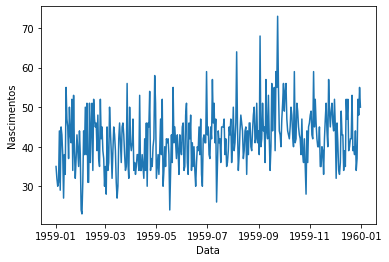

In [209]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel('Nascimentos')
plt.xlabel('Data')
plt.show()


E a figura da série após a diferenciação pode ser obtida por:
Nesta última figura, a tendência foi removida.

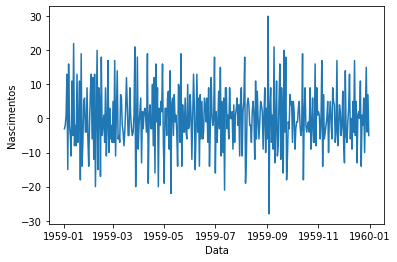

In [210]:
plt.plot(nasc ['data'],serie_diferenciada)
plt.ylabel('Nascimentos')
plt.xlabel('Data')
plt.show()

# Aula 03 - Previsão por suavização

## Video 3.1 - Suavização Exponencial

### Para o CO2

In [211]:
#alterando as datas para o índice
co2 = carbonico.set_index('data')

In [212]:
co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [213]:
#usando o passado como treino
treino_co2 = co2[1980.042:2015]

In [214]:
#criando um teste com os valores após 2015
teste_co2 = co2[2015:]

In [215]:
#usaremos a função SimpleExpSmoothing() do statsmodels
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#ajustando o modelo ao teste
modelo_ajustado = SimpleExpSmoothing(treino_co2).fit(smoothing_level=0.5) #definindo o nível de suavização

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [216]:
#fazendo a previsão
#conferindo quantos pontos nós devemos prever
teste_co2.shape
#previsão
modelo_previsto = modelo_ajustado.forecast(teste_co2.shape[0])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


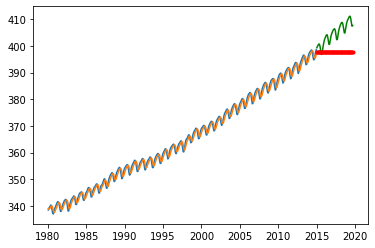

In [217]:
#plotando os dados
plt.plot(treino_co2)
plt.plot(treino_co2.index, modelo_ajustado.fittedvalues.values)
plt.plot(teste_co2, 'g')
plt.plot(teste_co2.index, modelo_previsto, 'r.') #prevendo como pontos em vermelho
#não foi uma previsão muito boa

### Para os nascimentos


In [218]:
nascimentos = nasc.set_index('data')
nascimentos.head()

,n_nasc
data,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [219]:
nasc_treino = nascimentos['1959-01-01':'1959-12-01']

In [220]:
nasc_teste = nascimentos['1959-12-01':]

In [221]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level = 0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [222]:
nasc_teste.shape[0]

31

In [223]:
modelo_previsto = modelo_ajustado.forecast(nasc_teste.shape[0])

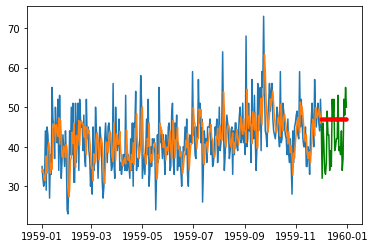

In [224]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.') #prevendo como pontos em vermelho


## Vídeo 3.2 - HoltWinters

### Os modelos consideram Nível, Tendência, Sazonalidade e Ruído:


**Modelo Aditivo**

$Y_t = N + T + S + R$

**Modelo Multiplicativo**

$Y_t = N * T * S * R$





### **Método de Holt:** Considera apenas a Tendência (nível e tendência)

*Tendência Aditiva*

$E_{t+k} = N_t + kT_t$

*Atualização do nível*

$N_t = {\alpha}Y_t + ( 1 - {\alpha})*(N_{t-1} + T_{t-1}1) $

*Atualização da tendência*

$T_t = {\beta}(N_t - N_{t-1}) + ( 1 - {\beta})* T_{t-1} $

*Tendência Multiplicativa*

$E_{t+k} = N_t (T_t)^k$



### **Método de Holt-Winters:** Considera também a sazonalidade

*Modelo Aditiva*

$E_{t+k} = N_t + kT_t + S_{t+k-M}$

*Modelo multiplicativo com tendência aditiva*

$E_{t+k} = (N_t + kT_t)S_{t+k-M}$

*Sazonalidade*

$S_t = {\gamma} \frac{Y_t}{L_t} + ( 1 - {\gamma})S_{t-M}$







## Video 3.3 HoltWinters Aplicado

### Na base de co2

In [225]:
#importando o objeto
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [226]:
#função ExponencialSmoothing do pacote statsmodels
modelo_ajustado = ExponentialSmoothing(treino_co2.values, trend='additive', 
                     seasonal='additive', seasonal_periods=35).fit() #informa os dados, tendência, sazonalidade e períodos

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [227]:
#fazendo previsões
teste_co2.shape[0], co2.shape[0]

(57, 477)

In [228]:
#prevendo os dados de treino (por isso chamamos o shape)
modelo_previsto = modelo_ajustado.predict(start=420, end = 476)

<function matplotlib.pyplot.show>

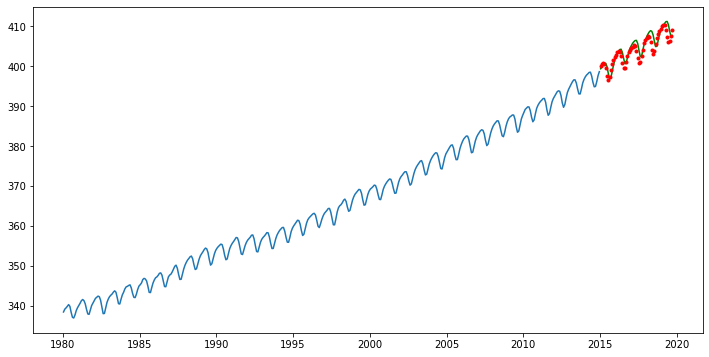

In [229]:
#plotando os dados
plt.figure(figsize=(12,6))
plt.plot(treino_co2)
plt.plot(teste_co2, 'g') #linha verde
plt.plot(teste_co2.index, modelo_previsto, 'r.')#linha vermelha
plt.show

### Na base de nascimentos

In [230]:
#função ExponencialSmoothing do pacote statsmodels
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', 
                     seasonal=None).fit() #informa os dados, tendência, sazonalidade e períodos

In [231]:
#fazendo previsões
(nascimentos.shape[0] - nasc_teste.shape[0]), (nascimentos.shape[0])

(334, 365)

In [232]:
#prevendo os dados de treino (por isso chamamos o shape)
modelo_previsto_suave = modelo_ajustado.predict(start=335, end = 365)

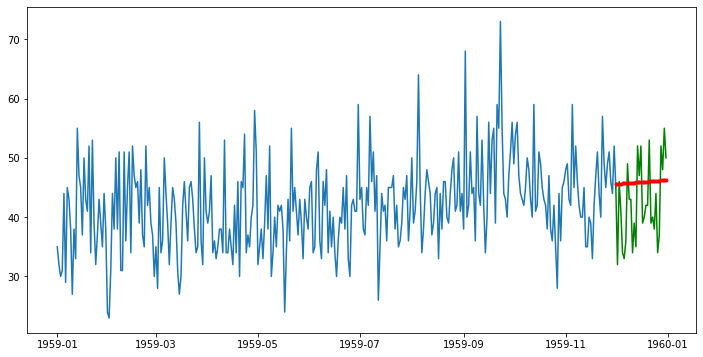

In [233]:
#plotando os dados
plt.figure(figsize=(12,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g') #linha verde
plt.plot(nasc_teste.index, modelo_previsto_suave, 'r.')#linha vermelha
plt.show()

# Aula 04 - Modelo autoregressivo

## Vídeo 4.1 - Autocorrelação total

In [234]:
from statsmodels.graphics.tsaplots import plot_acf

Os valores mais altos da autocorrelação indicam que existem partes semelhantes na série temporal.

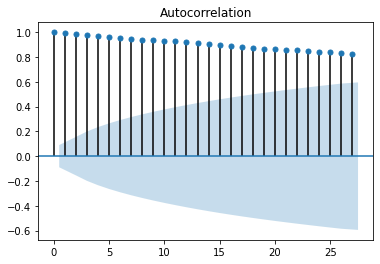

In [235]:
#usando a função do statsmodels para autocorrelação. Como possuímos uma alta sazonalidade, possuímos vários valores altos
#o cone azul define o intervalo de confiança
plot_acf(co2);

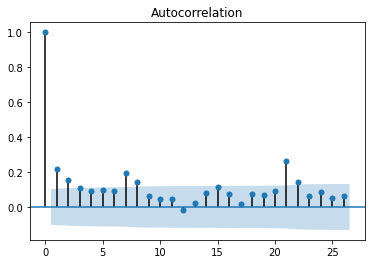

In [236]:
#fazendo com a base de nascimentos
plot_acf(nascimentos);

## Vídeo 4.2 - Autocorrelação Parcial

In [237]:
from statsmodels.graphics.tsaplots import plot_pacf

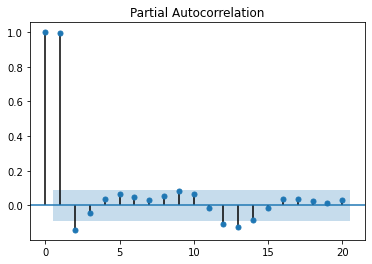

In [238]:
#os dois valores altos representam a sazonalidade dos nossos dados
plot_pacf(co2, lags=20);

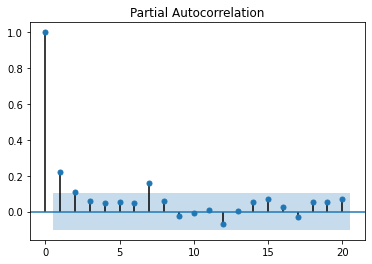

In [239]:
#com a base de nascimentos, como não temos uma sazonalidade muito alta o valor cai já no segundo ponto
plot_pacf(nascimentos, lags=20);

## Video 4.3 - Modelos Autorregressivos

Usam a autocorrelação para fazer a estimativa

### Usando a base co2

In [240]:
from statsmodels.tsa.ar_model import AutoReg

In [241]:
#criando uma lista de um a 40 de um em um
lista = np.linspace(1,40,40)

In [242]:
#usando a função AutoReg do statsmodels
modelo_ajustado = AutoReg(treino_co2.values, lags = lista, trend='c', seasonal = True, period=35).fit()

In [243]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)

<function matplotlib.pyplot.show>

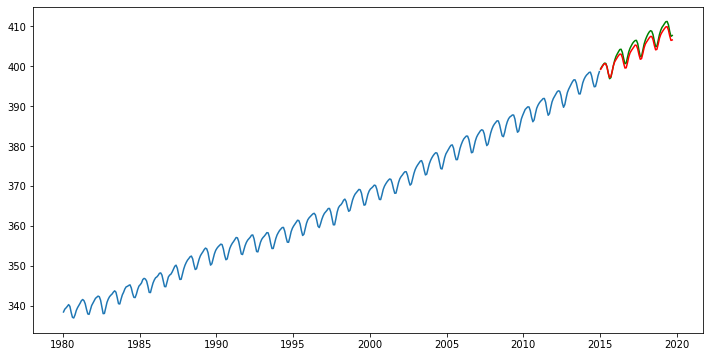

In [245]:
#gerando a imagem
plt.figure(figsize=(12,6))
plt.plot(treino_co2)
plt.plot(teste_co2, 'g')
plt.plot(teste_co2.index, modelo_previsto, 'r')
plt.show

### Usando os nascimentos


In [246]:
#usando a função AutoReg do statsmodels
#trend c quer dizer tendência acumulada
modelo_ajustado = AutoReg(nasc_treino.values, lags = lista, trend='c', seasonal =True, period=35).fit()

In [247]:
modelo_previsto_ar = modelo_ajustado.predict(start=335, end=365)

<function matplotlib.pyplot.show>

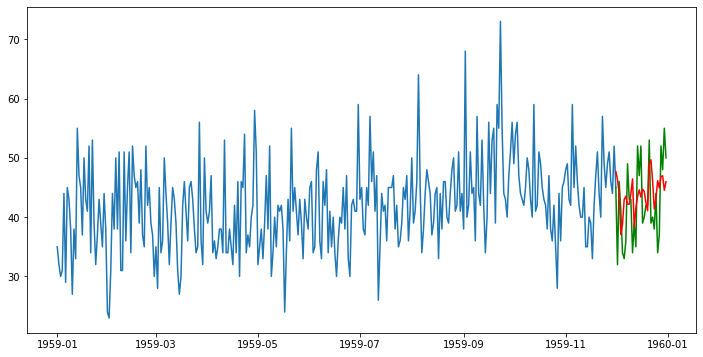

In [248]:
#gerando a imagem
plt.figure(figsize=(12,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r')
plt.show

#Aula 05 - Medidas de Performance

## Focando a na base de nascimentos

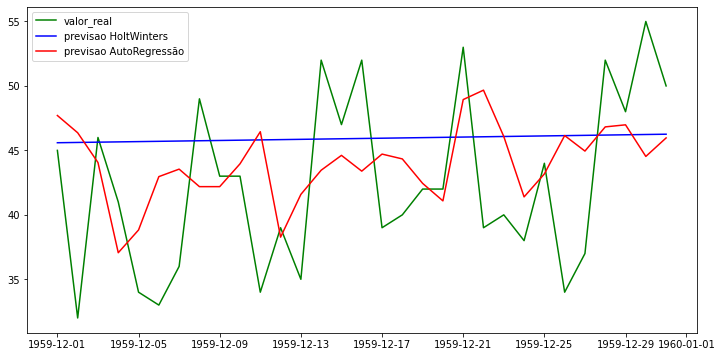

In [250]:
plt.figure(figsize=(12,6))
plt.plot(nasc_teste, 'g', label = 'valor_real')
plt.plot(nasc_teste.index, modelo_previsto_suave, 'b-', label = 'previsao HoltWinters')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r', label = 'previsao AutoRegressão')
plt.legend()
plt.show()

### Calculando o erro

In [254]:
#calculando o erro de previsão
erro_prev_s = nasc_teste['n_nasc'] - modelo_previsto_suave

In [255]:
erro_prev_a = nasc_teste['n_nasc'] - modelo_previsto_ar

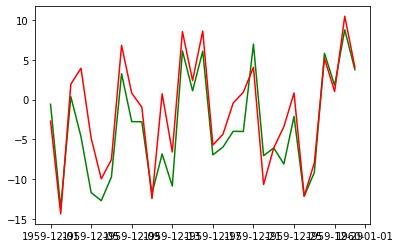

In [257]:
#comparando os erros
plt.plot(erro_prev_s, 'g')
plt.plot(erro_prev_a, 'r')

#### Erro médio

In [258]:
#calculando a média dos erros
np.mean(erro_prev_s)

-3.5361257930475367

In [259]:
np.mean(erro_prev_a)

-1.6083080804496934

#### Erro médio absoluto

In [260]:
#média absoluta
np.mean(np.abs(erro_prev_s))


6.374537352069753

In [261]:
np.mean(np.abs(erro_prev_a))

5.496720548092117

### Usando o sklearn

#### Erro médio absoluto

In [265]:
#fazendo a mesma coisa com o sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [263]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)

In [264]:
mae

5.496720548092117

#### Erro quadrático médio

In [271]:
mse_ar = mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

In [272]:
mse_ar

45.43739422181245

In [273]:
mse_suave = mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suave)
mse_suave

54.39586172649378